<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/week8/Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Week 8
# Classification 2

Classification is a core technique in the fields of data science and machine learning that is used to predict the categories to which data should belong. There are many algorithms that we can use, for example:
* Logistic Regression (already covered)
* K-Nearest Neighbours (KNN)
* Decision Tree
* Random Forest
* Support Vector Machines (SVM)
* Naive Bayes
* Neural Networks
* Etc.

Documentation about supervised learning algorithms (including classification and regression) with sklearn can be found [here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). This week we cover **K-Nearest Neighbours (KNN)** and **Decision Tree**.

## Table of Contents
#### 1. Recap on some important concepts
* 1.1 KNN
* 1.2 Decision Tree

#### 2. Basic examples
* 2.1 KNN
* 2.2 Decision Tree
* 2.3 Exercise

#### 3. Drug classification with different algorithms
* 3.1 Load, Clean and Explore Data
* 3.2 Prepare data for algorthms
* 3.3 KNN
* 3.4 Decision Tree

Author: Luc Kunz

## 1. Recap on some important concepts
We first recap some concepts seen in class.

### 1.1 KNN

In the K-Nearest Neighbors algorithm, in order to classify a point, we measure the distance (e.g. Euclidean distance) to the nearest k instances of the training set, and let them vote. K is typically chosen to be an odd number.

![KNN](https://miro.medium.com/max/1300/0*Sk18h9op6uK9EpT8.)


The KNN algorithm is very useful when there are non-linear decision boundaries, as shown below.

![KNN2](https://miro.medium.com/max/374/1*-W7HOfNfWk5BeXgF5jao6g.png)

### 1.2 Decision Tree

In this case, we use a tree to classify new data points. The tree is built based on the training set. At each node, the algorithm chooses the split that maximizes a certain criterion (e.g. Gini index, information gain). The objective of the algorithm is to find the simplest possible tree (i.e. only a few nodes and a small depth) with high accuracy. Like KNN, the decision tree method is very useful when there are non-linear decision boundaries.

In the example below, if we would have chosen another criterion for the first split (e.g. "Exercises in the morning"), we could have ended up with a lower accuracy and/or more splits (i.e. a more complex tree). 

![DT2](https://cdn.educba.com/academy/wp-content/uploads/2019/05/is-a-person-fit.png)

## 2. Basic examples
We illustrate KNN and Decision Tree with simple data sets.

In [1]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Customize plots
%matplotlib inline
sns.set_theme(style="white")
plt.style.use('dark_background')

### 2.1 KNN
We create data from scratch. We generate 16 points in the plane [0,1]. Points with low values of x1 and x2 are associated with class 0 and points with high values of x1 and x2 are associated with class 1.

In [2]:
# Create Data
data = {"x1":[0, 0.4, 0.15, 0.05, 0.4, 0.20, 0, 0.45, 1, 0.85, 0.9, 0.7, 0.65, 0.95, 1, 0.8],
"x2":[0.2, 0.35, 0, 0.10, 0.4, 0.25, 0.40, 0.35, 0.85, 0.95, 1, 0.65, 0.75, 0.9, 0.9, 0.95],
"y":[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]}

data = pd.DataFrame(data)
data

,x1,x2,y
0,0.00,0.20,0
1,0.40,0.35,0
2,0.15,0.00,0
3,0.05,0.10,0
4,0.40,0.40,0
5,0.20,0.25,0
6,0.00,0.40,0
7,0.45,0.35,0
8,1.00,0.85,1
9,0.85,0.95,1


We also have 3 points for which we do not know the class.

In [3]:
# New points
p = pd.DataFrame({"name":["p1", "p2", "p3"], "x1":[0.15, 0.75, 0.5],
"x2":[0.35, 0.8, 0.6]})
p

,name,x1,x2
0,p1,0.15,0.35
1,p2,0.75,0.80
2,p3,0.50,0.60


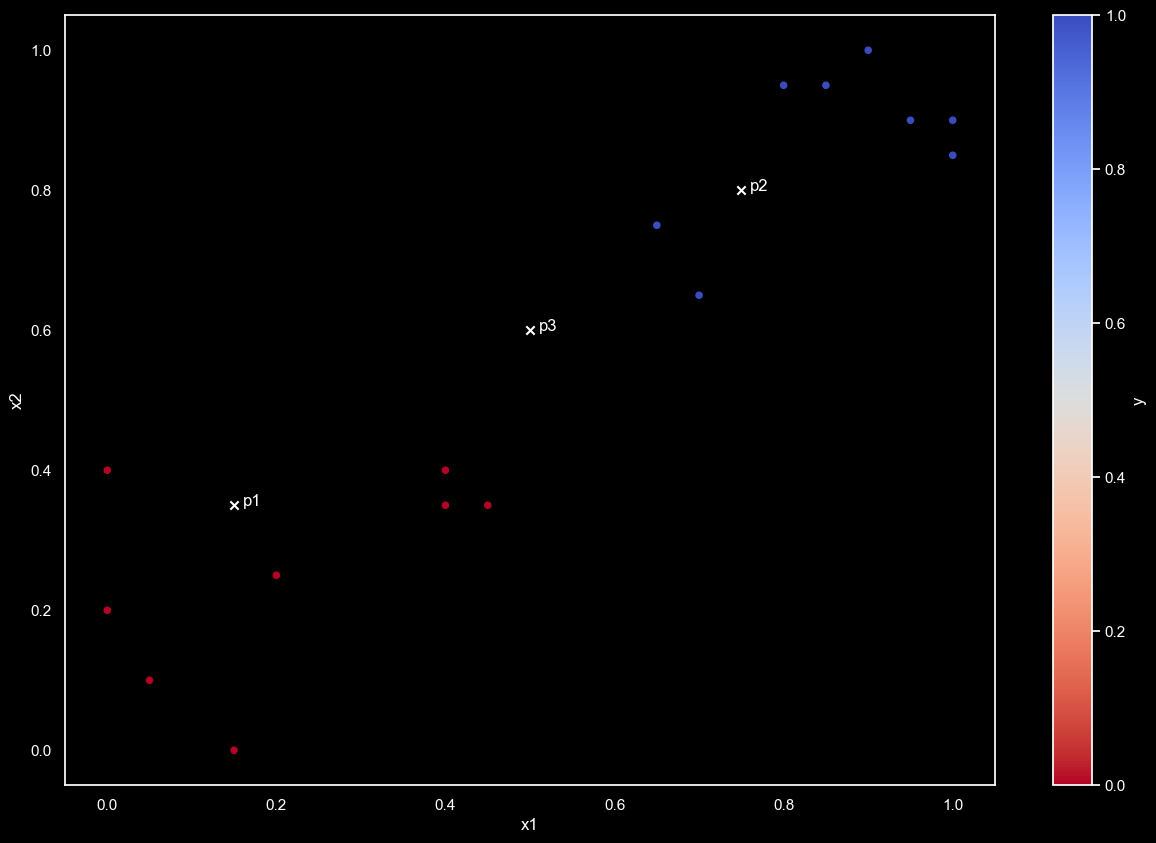

In [4]:
# Plot
data.plot.scatter("x1", "x2", c="y", colormap="coolwarm_r", figsize=(15, 10))
plt.scatter(p.x1, p.x2, c="white", marker="x")
for point in p.values:
  plt.text(point[1]+0.01, point[2], point[0])

The two classes can be identified on the above scatter plot. In addition, p1 seems to belong to class 0, p2 to class 1, and this is more difficult for p3. Below we classify the new points using the KNN algorithm with different k (i.e. the number of neightboor we consider).

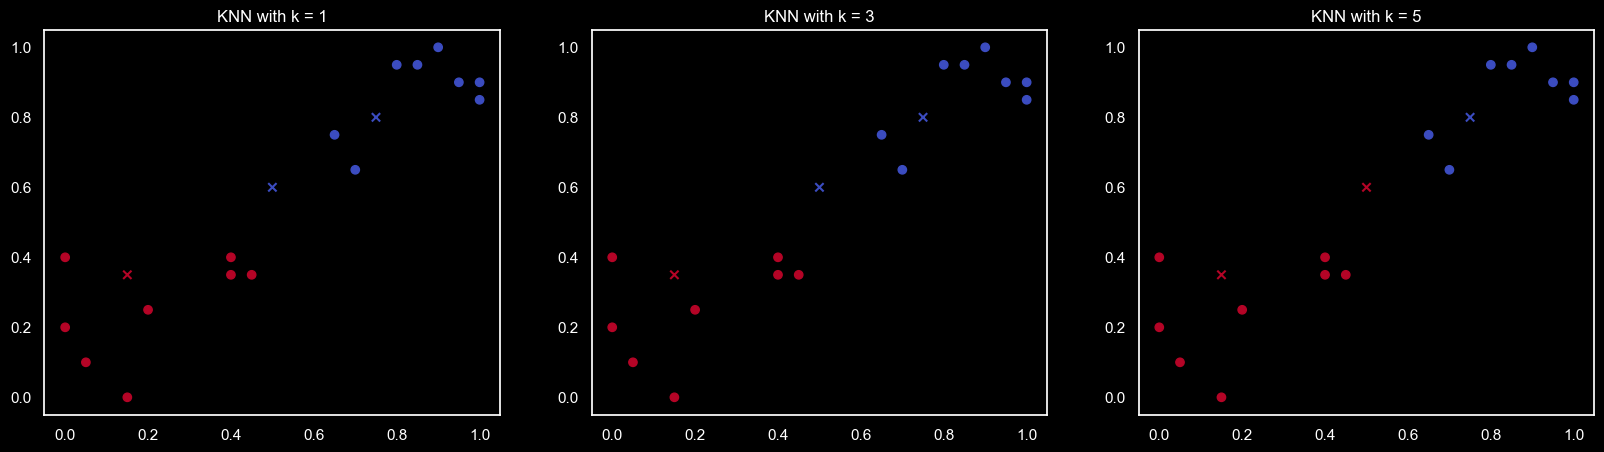

In [5]:
# Select X and y
X = data[["x1", "x2"]]
y = data["y"]

# KNN plot
from sklearn.neighbors import KNeighborsClassifier
fig, ax = plt.subplots(1, 3, figsize=(20,5))
i = 0
for k in [1, 3, 5]:
  model = KNeighborsClassifier(n_neighbors=k).fit(X,y)
  pred = model.predict(p[["x1", "x2"]])
  ax[i].scatter(data.x1, data.x2, c=data.y, cmap="coolwarm_r")
  ax[i].scatter(p.x1, p.x2, c=pred, cmap="coolwarm_r", marker="x")
  ax[i].set_title("KNN with k = " + str(k))
  i += 1

For k = 1 and k = 3, p3 belongs to class 0 while it belongs to class 1 for k = 5.

### 2.2 Decision Tree
We now present the concept of the decision tree using, again, basic examples. We predict the salary class (0 or 1) according to individual characteristics. With the sklearn, the criterion for determining the split at each node is the [Gini index](https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8).

In [6]:
# Change style (to make the trees below beautiful)
plt.style.use('classic')

In [7]:
# Decision tree
example = 1 # 1, 2 or 3 

if example == 1:
  data = {"Degree":["Apprenticeship", "Apprenticeship", "Master", "Bachelor", "Master", "Apprenticeship", "Bachelor", "Bachelor", "Master", "Master"],
  "Sex":[1, 1, 0, 1, 0, 1, 1, 0, 1, 1], 
  "Salary Class":[0, 0, 1, 0, 1, 0, 0, 1, 1, 1]}
  data = pd.DataFrame(data)
elif example == 2:
  data = {"Age":[20, 16, 50, 23, 36, 33, 41, 22, 27, 57],
  "Degree":["Apprenticeship", "School", "Master", "Bachelor", "Bachelor", "Apprenticeship", "Bachelor", "Bachelor", "Master", "Master"],
  "Sex":[0, 1, 0, 1, 0, 1, 0, 1, 0, 1], 
  "Salary Class":[0, 0, 0, 0, 1, 1, 0, 0, 1, 1]}
  data = pd.DataFrame(data)
elif example == 3:
  data = {"Degree":["Apprenticeship", "School", "Master", "Bachelor", "Bachelor", "Apprenticeship", "Bachelor", "Bachelor", "Master", "Master"],
  "Sex":[0, 1, 0, 1, 0, 1, 0, 1, 0, 1], 
  "Salary Class":[1, 1, 0, 1, 1, 0, 0, 0, 1, 1]}
  data = pd.DataFrame(data)
else:
  data = np.nan
  raise ValueError("'example' should be 1, 2 or 3")

data

,Degree,Sex,Salary Class
0,Apprenticeship,1,0
1,Apprenticeship,1,0
2,Master,0,1
3,Bachelor,1,0
4,Master,0,1
5,Apprenticeship,1,0
6,Bachelor,1,0
7,Bachelor,0,1
8,Master,1,1
9,Master,1,1


We have three examples.

Example 1: 
* All "Master" belong to class 1.
* Among the rest, if sex == 0, then class 1.
* A human could do the classification (easy).

Example 2:
* More difficult to see something...
* Hint: look at young people...

Example 3:
* Illustrates that it is sometimes difficut to classify.
* This is because of lack of pattern in the data.
* If there is nothing to discover, then the algorithm will discover nothing...
* The tree below illustrates this well.

In [8]:
# Encode the categorical feature
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
one_hot_degree = one_hot.fit_transform(data[["Degree"]]).toarray()
one_hot_degree = pd.DataFrame(one_hot_degree, columns=one_hot.get_feature_names_out(["Degree"]))

one_hot_degree

,Degree_Apprenticeship,Degree_Bachelor,Degree_Master
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,0.0,1.0
9,0.0,0.0,1.0


In [9]:
# Concat
data_tree = pd.concat([data, one_hot_degree], axis=1)
data_tree

,Degree,Sex,Salary Class,Degree_Apprenticeship,Degree_Bachelor,Degree_Master
0,Apprenticeship,1,0,1.0,0.0,0.0
1,Apprenticeship,1,0,1.0,0.0,0.0
2,Master,0,1,0.0,0.0,1.0
3,Bachelor,1,0,0.0,1.0,0.0
4,Master,0,1,0.0,0.0,1.0
5,Apprenticeship,1,0,1.0,0.0,0.0
6,Bachelor,1,0,0.0,1.0,0.0
7,Bachelor,0,1,0.0,1.0,0.0
8,Master,1,1,0.0,0.0,1.0
9,Master,1,1,0.0,0.0,1.0


In [10]:
# Select X and y
X = data_tree.drop(["Degree", "Salary Class"], axis=1)
y = data_tree["Salary Class"]

# Classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier()
tree.fit(X, y)
tree.score(X, y)

1.0

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.5, 'x[0] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

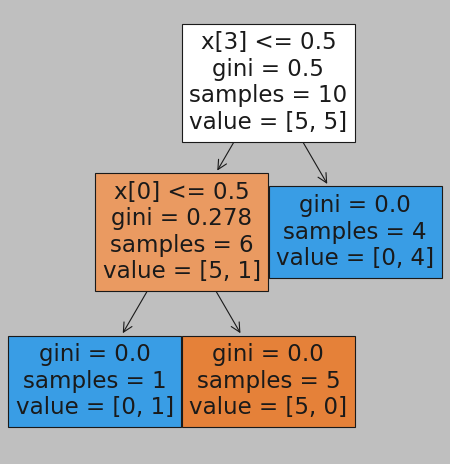

In [11]:
plt.figure(figsize=(7,7))
plot_tree(tree, filled=True)

In [12]:
# To see the splits
pd.concat([X, y], axis=1)

,Sex,Degree_Apprenticeship,Degree_Bachelor,Degree_Master,Salary Class
0,1,1.0,0.0,0.0,0
1,1,1.0,0.0,0.0,0
2,0,0.0,0.0,1.0,1
3,1,0.0,1.0,0.0,0
4,0,0.0,0.0,1.0,1
5,1,1.0,0.0,0.0,0
6,1,0.0,1.0,0.0,0
7,0,0.0,1.0,0.0,1
8,1,0.0,0.0,1.0,1
9,1,0.0,0.0,1.0,1


#### **Important note**: if you end up with a deep tree and an **train** accuracy close to or equal to 1, there is a big probability of overfitting, as explained [here](https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6). The solution to avoid overfitting and find the best hyperparameters is to use cross-validation. More on this in Section 3.3.

Question for the students: what is a deep tree?

### 2.3 Exercise
To do in groups: follow the steps and send your answers and code @Luc Kunz on Slack (direct message) or via Zoom (private). This is a good way to improve your participation grade.

The objective is to illustrate the power of decision trees with data having non-linear boundaries.

In [13]:
# Data Set
fruits = {"width":[3, 3.5, 3.5, 2.5, 4, 3.2, 3.6, 4.0, 2.8, 3.9, 7.7, 7.2, 7.8, 8.3, 7.3, 7.1, 8.5, 7.3, 9.2, 7.9, 7.3, 8.7],
"height":[1.5, 2.5, 2, 1.3, 2.1, 7.4, 8.3, 7.9, 9.1, 8.5, 8.1, 7.8, 6.9, 7.4, 7.1, 7.1, 3.8, 4.2, 4.9, 5.4, 3.8, 4.4],
"fruit":["orange", "orange", "orange", "orange", "orange", "apple", "apple", "apple", "apple", "apple", "orange", "orange", "orange", "orange", "orange", "orange", "apple", "apple", "apple", "apple", "apple", "apple"]}

fruits = pd.DataFrame(fruits)
fruits

,width,height,fruit
0,3.0,1.5,orange
1,3.5,2.5,orange
2,3.5,2.0,orange
3,2.5,1.3,orange
4,4.0,2.1,orange
5,3.2,7.4,apple
6,3.6,8.3,apple
7,4.0,7.9,apple
8,2.8,9.1,apple
9,3.9,8.5,apple


<Axes: xlabel='width', ylabel='height'>

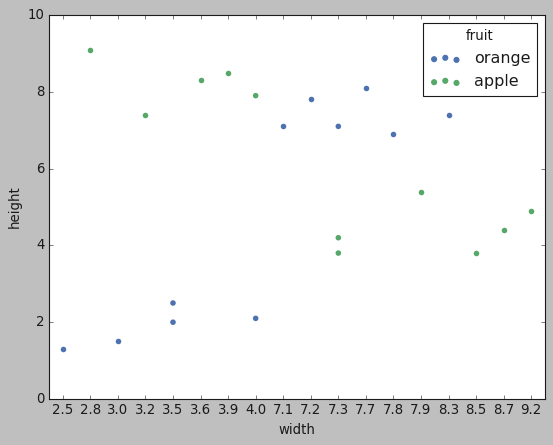

In [14]:
# Plot
sns.swarmplot(x='width', y='height', hue='fruit', data=fruits)

In [15]:
# Select variables
X = fruits[["width", "height"]]
y = fruits.fruit

0.5454545454545454
1.0
3


[Text(0.3333333333333333, 0.875, 'x[1] <= 3.15\ngini = 0.5\nsamples = 22\nvalue = [11, 11]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5, 0.625, 'x[1] <= 6.15\ngini = 0.457\nsamples = 17\nvalue = [11, 6]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 5.55\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

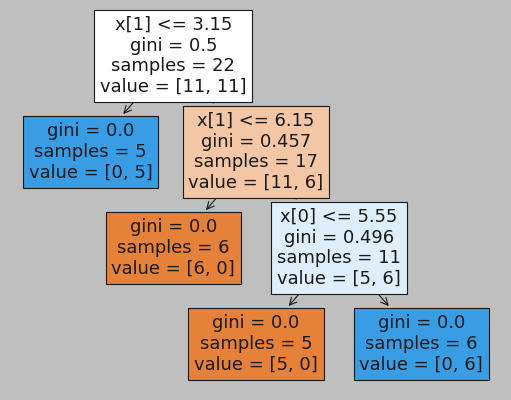

In [16]:
from sklearn.linear_model import LogisticRegression
# 1. Apply a Logistic Regression to the data. What is the train accuracy?
LR = LogisticRegression()
LR.fit(X, y)
print(LR.score(X, y)) # 0.545454545
# Explain in one sentence why it is not an appropriate algorithm.
# --> Because the boundaries are non linear.

# 2. Apply a Decision Tree to the data. Plot the tree. What is the depth of the tree? What is the train accuracy?
tree = DecisionTreeClassifier()
tree.fit(X, y)
print(tree.score(X, y)) # 1.0
print(tree.get_depth()) # 3
plot_tree(tree, filled=True)

## 3. Drug Classification
We classify people into drug categories according to their individual characteristics.

### 3.1 Load, Clean and Explore Data

In [17]:
# Load dataset
url = "https://raw.githubusercontent.com/LKunz/Projets/refs/heads/main/Data%20Science/data/drug200.csv"
df = pd.read_csv(url)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


The variables:

* Age: Age of patient
* Sex: Gender of patient
* BP: Blood pressure of patient
* Cholesterol: Cholesterol of patient
* Na_to_K: Sodium to Potassium Ratio in Blood
* Drug: Drug Type

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [19]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


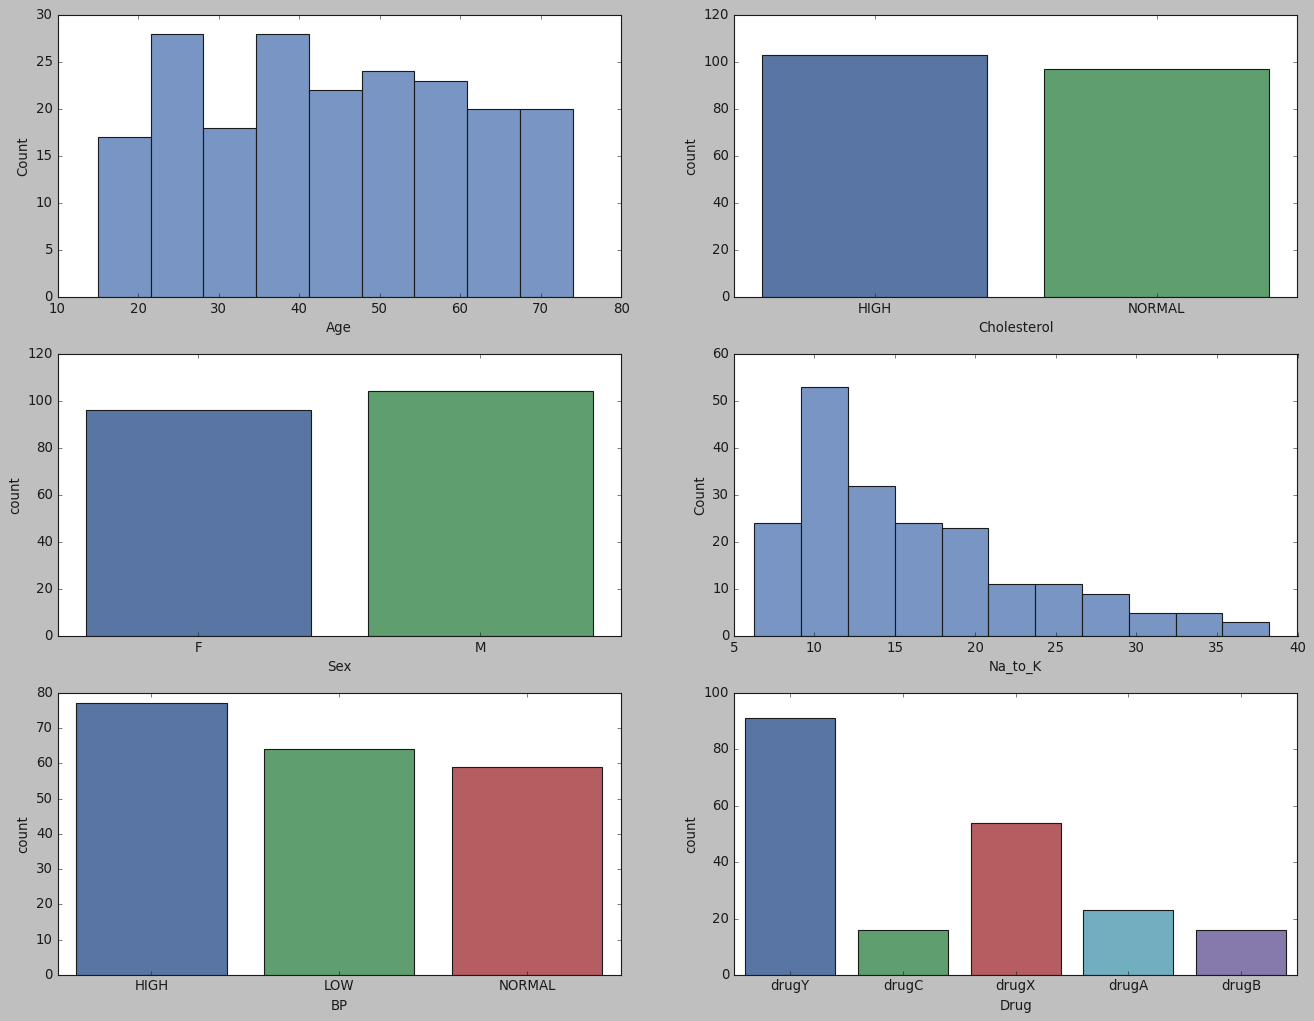

In [20]:
# Univariate Analysis
fig, ax = plt.subplots(3, 2, figsize=(20,15))
i = 0
j = 0
for var in df:
  if df[var].dtypes == "object":
    sns.countplot(x=df[var], ax=ax[i, j])
  else:
    sns.histplot(df[var], ax=ax[i, j])
  i += 1
  if i == 3:
    i = 0
    j += 1
plt.show()

In [21]:
# What is the base rate?
# [wite your code here]

<Figure size 800x800 with 0 Axes>

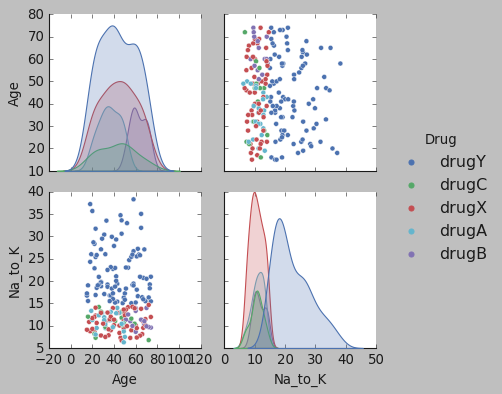

In [22]:
plt.figure(figsize=(10,10))
sns.pairplot(df, hue="Drug")

We see that all people with a Na_to_K ration above around 15 take DrugY. This will be useful for classification.

### 3.2 Prepare data for algorthms

In [23]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [24]:
# Label Encoding
df.Sex = df.Sex.astype('category').cat.codes
df.BP = df.BP.astype('category').cat.codes
df.Cholesterol = df.Cholesterol.astype('category').cat.codes
df.Drug = df.Drug.astype('category').cat.codes
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [25]:
# Select Features
X = df.drop(["Drug"], axis=1)
y = df.Drug

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=72)
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
90,62,1,2,0,16.594
163,21,0,0,1,28.632
76,36,0,0,0,11.198
113,65,0,1,1,13.769
98,20,1,0,1,35.639
...,...,...,...,...,...
69,18,0,0,1,24.276
101,45,0,0,0,12.854
74,31,1,0,1,17.069
46,37,0,0,0,13.091


In [26]:
y_train

90     4
163    4
76     0
113    3
98     4
      ..
69     4
101    0
74     4
46     0
19     4
Name: Drug, Length: 130, dtype: int8

### 3.3 KNN

We first need to normalize (i.e. rescale) the data since we are using distances. The `MinMaxScaler()` maps the data in the interval (0,1).

In [27]:
# Normalization (since distance)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) 
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
X_train_norm[:10]

array([[0.79661017, 1.        , 1.        , 0.        , 0.32287823],
       [0.10169492, 0.        , 0.        , 1.        , 0.69932454],
       [0.3559322 , 0.        , 0.        , 0.        , 0.15413722],
       [0.84745763, 0.        , 0.5       , 1.        , 0.23453624],
       [0.08474576, 1.        , 0.        , 1.        , 0.91844393],
       [0.13559322, 0.        , 0.        , 0.        , 0.59684783],
       [0.52542373, 1.        , 1.        , 1.        , 0.03177184],
       [0.72881356, 0.        , 0.        , 1.        , 0.24923385],
       [0.3559322 , 1.        , 0.5       , 1.        , 0.16120458],
       [0.88135593, 1.        , 1.        , 1.        , 0.10147601]])

0.7143


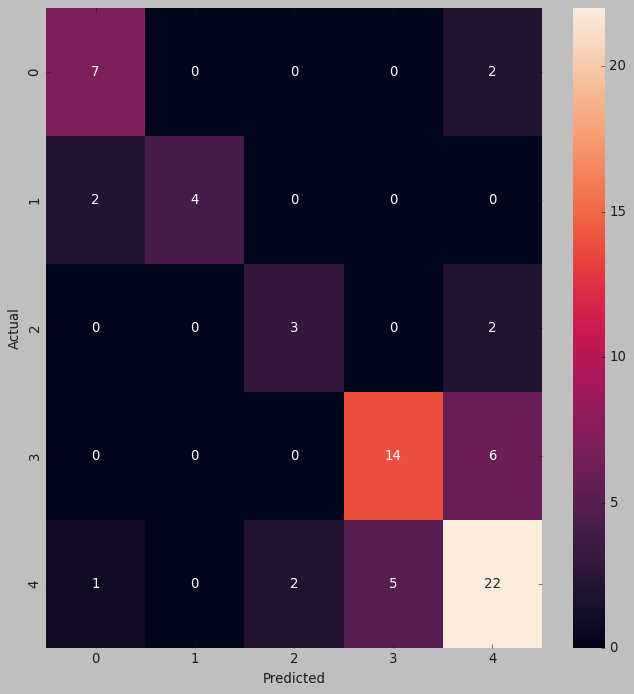

In [28]:
# Fit KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_norm, y_train)

# Prediction for test set
y_pred = knn.predict(X_test_norm)

# Evaluate model
def accuracy_conf_mat(y_test, y_pred):
  print(round(accuracy_score(y_test, y_pred), 4))
  conf_mat = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

accuracy_conf_mat(y_test, y_pred)

We now want to test which hyperparameters of the [KNN class](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) are the optimal ones. For this we use [Grid Search Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [29]:
# Grid Search - hyperparameters tunning
from sklearn.model_selection import GridSearchCV

# Define parameters to test
grid = {'n_neighbors':np.arange(1,100),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

# Define and fit model
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=10)
knn_cv.fit(X_train_norm, y_train)

# Print results
print("Hyperparameters:", knn_cv.best_params_)
print("Train Score:", round(knn_cv.best_score_, 4))
print("Test Score:", round(knn_cv.score(X_test_norm, y_test), 4))

Hyperparameters: {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Train Score: 0.8308
Test Score: 0.8143


0.8143


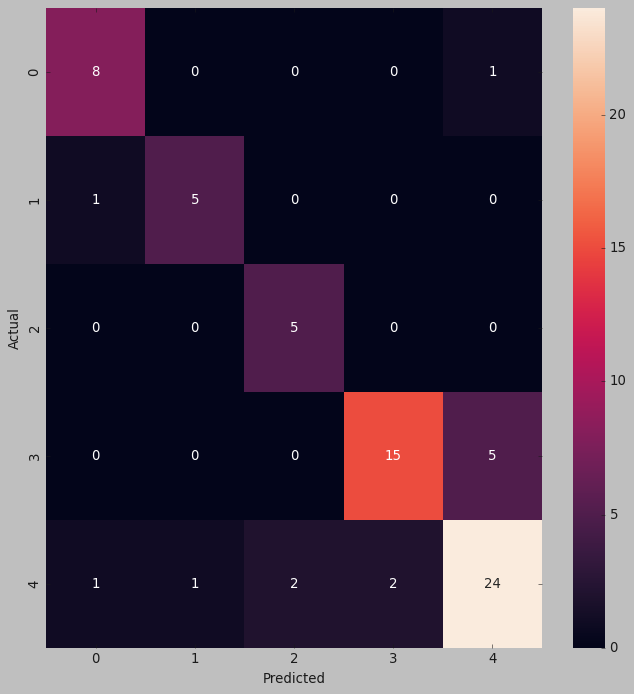

In [30]:
# Fit optimal KNN model
knn = KNeighborsClassifier(n_neighbors=1, p=2, weights='uniform')
knn.fit(X_train_norm, y_train)

# Prediction for test set
y_pred = knn.predict(X_test_norm)

# Evaluate model
def accuracy_conf_mat(y_test, y_pred):
  print(round(accuracy_score(y_test, y_pred), 4))
  conf_mat = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

accuracy_conf_mat(y_test, y_pred)

### 3.4 Decision Tree

0.9714


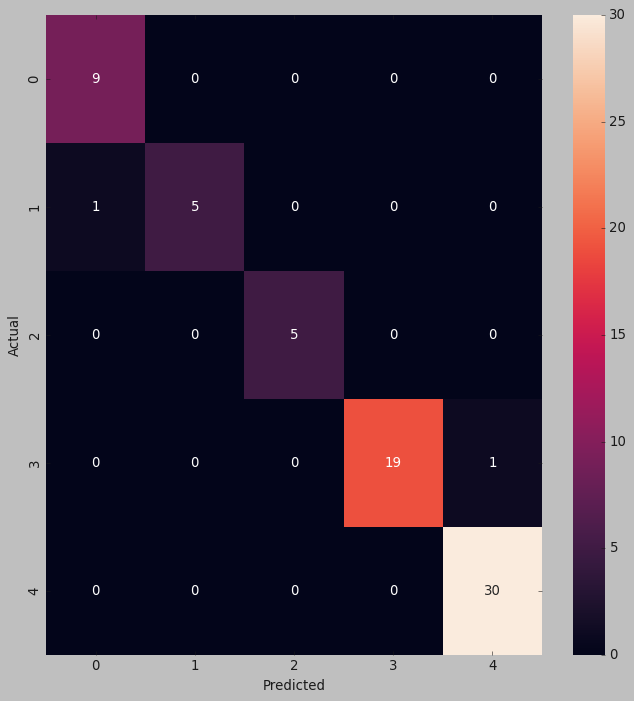

In [31]:
# Fit model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predict
y_pred = tree.predict(X_test)

# Evaluate model
accuracy_conf_mat(y_test, y_pred)

[Text(0.625, 0.9, 'x[4] <= 14.627\ngini = 0.687\nsamples = 130\nvalue = [14, 10, 11, 34, 61]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.67\nsamples = 69\nvalue = [14, 10, 11, 34, 0]'),
 Text(0.25, 0.5, 'x[0] <= 51.5\ngini = 0.486\nsamples = 24\nvalue = [14, 10, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 14\nvalue = [14, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[3] <= 0.5\ngini = 0.369\nsamples = 45\nvalue = [0, 0, 11, 34, 0]'),
 Text(0.625, 0.3, 'x[2] <= 1.5\ngini = 0.495\nsamples = 20\nvalue = [0, 0, 11, 9, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 0, 25, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 61\nvalue = [0, 0, 0, 0, 61]')]

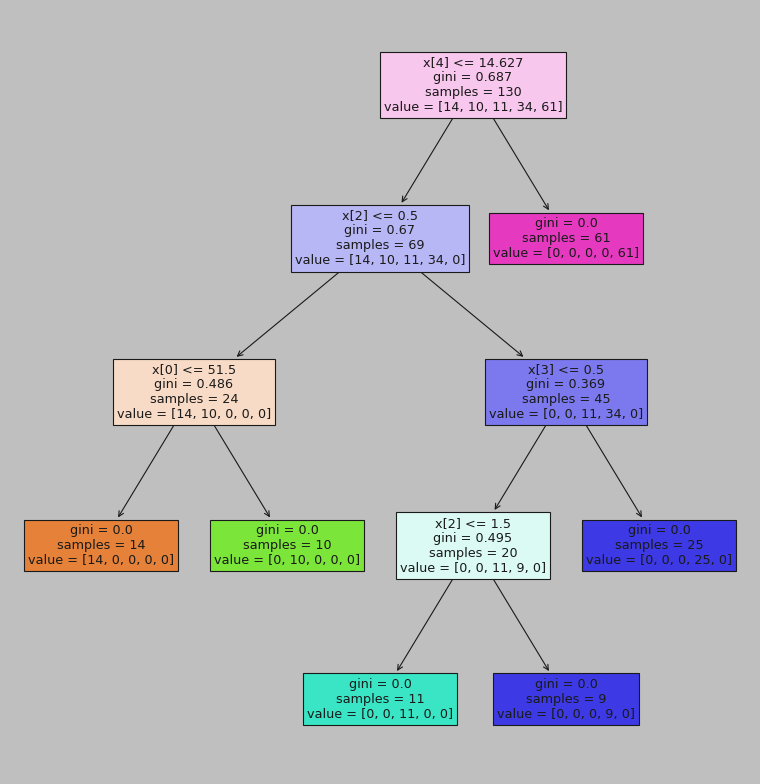

In [32]:
plt.figure(figsize=(12, 12))
plot_tree(tree, filled=True)

In [33]:
# First split
training_data = pd.concat([X_train, y_train], axis=1)
training_data[training_data.Na_to_K > 14.627]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
90,62,1,2,0,16.594,4
163,21,0,0,1,28.632,4
98,20,1,0,1,35.639,4
0,23,0,0,0,25.355,4
6,49,0,2,0,16.275,4
...,...,...,...,...,...,...
29,45,1,1,0,17.951,4
26,31,1,0,0,30.366,4
69,18,0,0,1,24.276,4
74,31,1,0,1,17.069,4


In [34]:
# Accuracy in training set
tree.score(X_train, y_train)

1.0

We are not in the above-mentioned case of overfitting here since good results in test data. In addition a depth of 4 with 5 classes is optimal. With real life data, this may be different... Grid search cross-validation is not useful in this case. We can however try with different depths.

Depth: 1
0.7


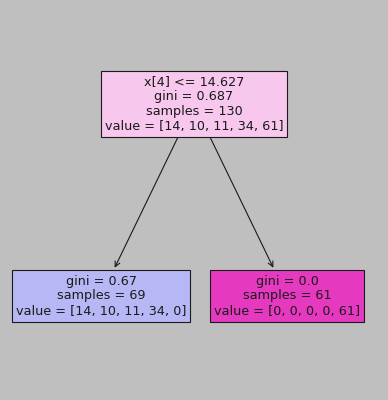






Depth: 2
0.83


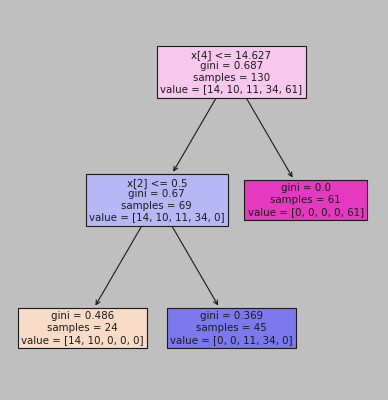






Depth: 3
0.81


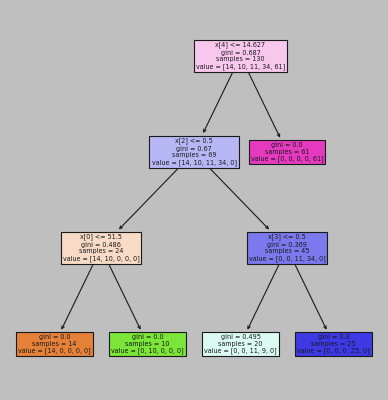






Depth: 4
0.97


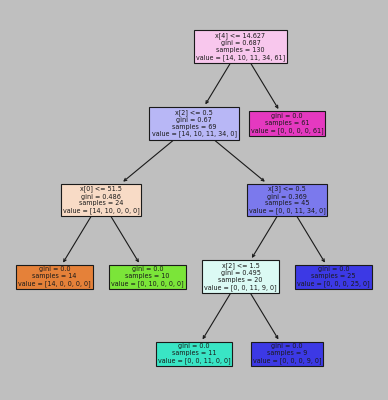

In [35]:
# Look for simpler trees
for depth in [1, 2, 3, 4]:
    tree = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    print("Depth: " + str(depth))
    print(round(accuracy_score(y_test, y_pred), 2))
    plt.figure(figsize=(6, 6))
    plot_tree(tree, filled=True)
    plt.show()
    print("\n\n\n\n")

## References:
https://www.kaggle.com/gorkemgunay/drug-classification-with-different-algorithms/notebook